# Usage of GIC class

##### In this jupyter notebook I will show you how to use the GIC function, and how to modify it for your own personal use.

### 1. Set-up
Before every aspect of the class can be used, we first need to import the code and set some basic data for the \__init__ function.
We need the following paths and data in the following order:
- 1. Path to network *.csv files (i.e. spreadsheettrafo.csv and spreadsheetcables.csv): these files are needed when we want to apply an electric field to the network. You can modify these .csv files to make your own network.
- 2. Path to location where specific magnetic observatory data will be downloaded (*min.min or *sec.sec files): magnetic data will be downloaded in a folder in this location to be used later in the interpolation of the magnetic field.
- 3. Path to location where processed data will be put. This path will serve as the basic location where any processed data will be stored (up to 5 GB/day).
- 4. Datum of the day you want to investigate (here 29-10-2003) given as dd-mm-yyyy. This datum will be used later to download data from that specific day, and to create folders, with that datum as name, to store processed/downloaded data.

###### Very important: use unique paths for the first three variables, otherwise the code will not work!
This will look like the following piece of code:

In [1]:
from Dutch_GIC.dutchgic import GIC
Case_1=GIC('/usr/people/out/Documents/380+220kV_extended','/usr/people/out/Documents/Magnetic_field/magnetic_data','/nobackup/users/out/Magnetic_field','31-10-2003')

### 2. Logging
Throughout the code various actions are logged. If you want to read those logs you have to initiate a logbook with the logging function (happens automatically when you use the _runall_ function). Lets say we want to store our logbook where are of our processed data is located. Then the needed piece of code looks like: 

In [2]:
import logging
logging.basicConfig(filename='/nobackup/users/out/Magnetic_field/logbook.log', level=logging.DEBUG, format='%(asctime)s %(message)s')

### 3. Download some data
Now that the basic paths are set, we are ready to download some magnetic data. We already set the date for which we want to download some data. However, to obtain the signal only caused by space weather we have to subtract the data from a day when space weather was relatively quiet. The function performs this job automatically by going to the [website of Potsdam](https://www.gfz-potsdam.de/en/home/) and look up the nearest quiet day (this day will be printed on screen). The data for this quiet day is then also automatically downloaded.

You also have to specify for which stations you want to download data by making a list containing the [IAGA codes](http://www.wdc.bgs.ac.uk/catalog/obs_code.html) of the stations. If you specify nothing a standard list will be used with the stations: Brorfelde, Chambon la foret, Dourbes, Eskdalemuir, Furstenfeldbruck, Hartland, Lerwick, Niemegk, Uppsala, and Wingst. We specify a list with all the stations mentioned here for illustrative purposes and we want minute mean data (so types=True, for second mean data types=False) in the following piece of code:

In [3]:
Case_1.standard_download(['fur','had','bfe','clf','dou','esk','ler','ngk','ups','wng'],types=True)

Quiet day is 11-10-2003


The object _Case_1.quietpath_ is now set at "11-10-2003"

### 4. Process data: extract space weather
The data for both the active and quiet day has been downloaded, so now we can process the data to extract the magnetic signal of the space weather event from the active day. Because we want to do this for multiple stations we use the function _iteratestation_ to iterate over the function _newplotspace_ which extracts the data from the downloaded files in the specific folder indicated by _Case_1.respath_. Optional argument than can be included is whether we want to store some figures in the processed data folder (then plots=True). If we want this, the piece of code will look like:

In [4]:
Case_1.iteratestation(plots=True)

In the Jupyter notebook version (Class_GIC_notebook.ipynb) it is possible to get some plots in the terminal by setting the figures to True in the _iteratestation_ function.

The _iteratestation_ function can automatically detect whether the data is minute mean data or second mean data.

### 5. Process data: interpolate magnetic field
The magnetic data per station is now available, however this is only for some points. We want to interpolate the magnetic field over the Netherlands, to transform it later to an electric field. We will do this by using the function _magnetic_interpolation_. This function is called as follows:

In [5]:
Case_1.magnetic_interpolation()

['/nobackup/users/out/Magnetic_field/31-10-2003/Brorfelde_2003-10-31', '/nobackup/users/out/Magnetic_field/31-10-2003/Chambon_2003-10-31', '/nobackup/users/out/Magnetic_field/31-10-2003/Dourbes_2003-10-31', '/nobackup/users/out/Magnetic_field/31-10-2003/Eskdalemuir_2003-10-31', '/nobackup/users/out/Magnetic_field/31-10-2003/Furstenfeldbruck_2003-10-31', '/nobackup/users/out/Magnetic_field/31-10-2003/Hartland_2003-10-31', '/nobackup/users/out/Magnetic_field/31-10-2003/Lerwick_2003-10-31', '/nobackup/users/out/Magnetic_field/31-10-2003/Niemegk_2003-10-31', '/nobackup/users/out/Magnetic_field/31-10-2003/Uppsala_2003-10-31', '/nobackup/users/out/Magnetic_field/31-10-2003/Wingst_2003-10-31']


The string shown on the screen gives information about which magnetic stations are used for the interpolation. You can check their locations up here.

The data is stored in the interpolation folder as either *.csv (northwards directed magnetic field) or *.csv.Y (eastwards directed magnetic field)

#### processors
This code is optimized for a computer with only 16GB of memory. This means that for the interpolation procedure only 3 processors can be used at the same time without flooding the memory. If you have much more or less memory you can change the number of processors to, lets say, _n_ by calling the function as:
- Case_1.magnetic_interpolation(n)

#### interpolated area
The area over which we interpolate can also be changed! The area where the SECS are located is at line 1381 in dutchgic.py:
- localvar.result=self.mag_interpolate(location,localvar.values,np.array([43,63,-13,20]),0.5)

You can changes 43,63,-13,20 (lattitude start, end, longitude start, end) to the location you want. You can also change the gridspacing of 0.5 degree to whatever you want.

Then the area which you want to interpolate over can also be changed, this is found at lines 1468-1481 in dutchgic.py. You have to change this to the area whereover you want to interpolate!

### 6. Process data: transform to electric field
With a interpolated magnetic field, we can now obtain the electric field by using the _BtoE_ function. This function has different parameters to choose from. First of all, we have the required integer parameter which determines which conductivity model you are going to use. These conductivity models can be found in the _transferfunction_ function. There have are already been inputted some conductivitymodels, but if you want, you can make your own and give it a specific number (see the examples in the transferfunction: lines 2195-2230 in dutchgic.py) so that you can use it in the _BtoE_ function. We use here conductivitymodel 7

You can also optionally choose to scale the magnetic signal with any value you want, for now we just leave it at 1 (default value). Last, you can choose how manby processors you want to assign to the computations, we will leave it at the default 6 processors.

The piece of code with the given parameters will look like:

In [6]:
Case_1.BtoE(7)

setting up matrices!
starting fourier transformation


The northwards directed electric field is stored in the electric_field_north folder. The eastwards directed electric field is stored in the electric_field_east folder.

### 7. Calculate GICs
Now we finally can apply the electric field to the powergrid network we set up through the two *.csv files. We use the _calculate_GIC_ function to do this.

The first optional parameters is guess (default 80), this determines in how many pieces at the start the electric field is integrated over the transmission cables. The integration procedure will continue until a certain thresshold ($10^{-5}$) is reached. If you set this value to low, this function will take very long to run. 

Then we have the plotting parameter. If set at True (default), a gmt plot showing the GICs at every station will be made. If you want to plot a different area, you will have to change the coordinates (longitude start, end, latitude start, end) at lines 941-944 in dutchgic.py. If True. it increases the duration of the function, so we will set it to False here.

The last parameter determines how many processors are allocated to this function. The default is six, and we will leave it at that.

With the given parameters, the code will look like:

In [7]:
Case_1.calculate_GIC(guess=80, plotting=False)

New data is added now!
Script has been completed!


The generated files can be found in the new GIC folder as .csv files

### 8. Plotting GICs
The last thing we want to do is plot the GICs per station thorugh time by using the _plot_GIC_ function. The only optional parameter needed is which stations you want to plot. The default stations are set to be all Dutch transformer stations if nothing is passed as an argument. For now we choose we want to plot the first two stations from our spreadshetttrafo.csv file: Eemshaven and Meeden. The code will then look like:

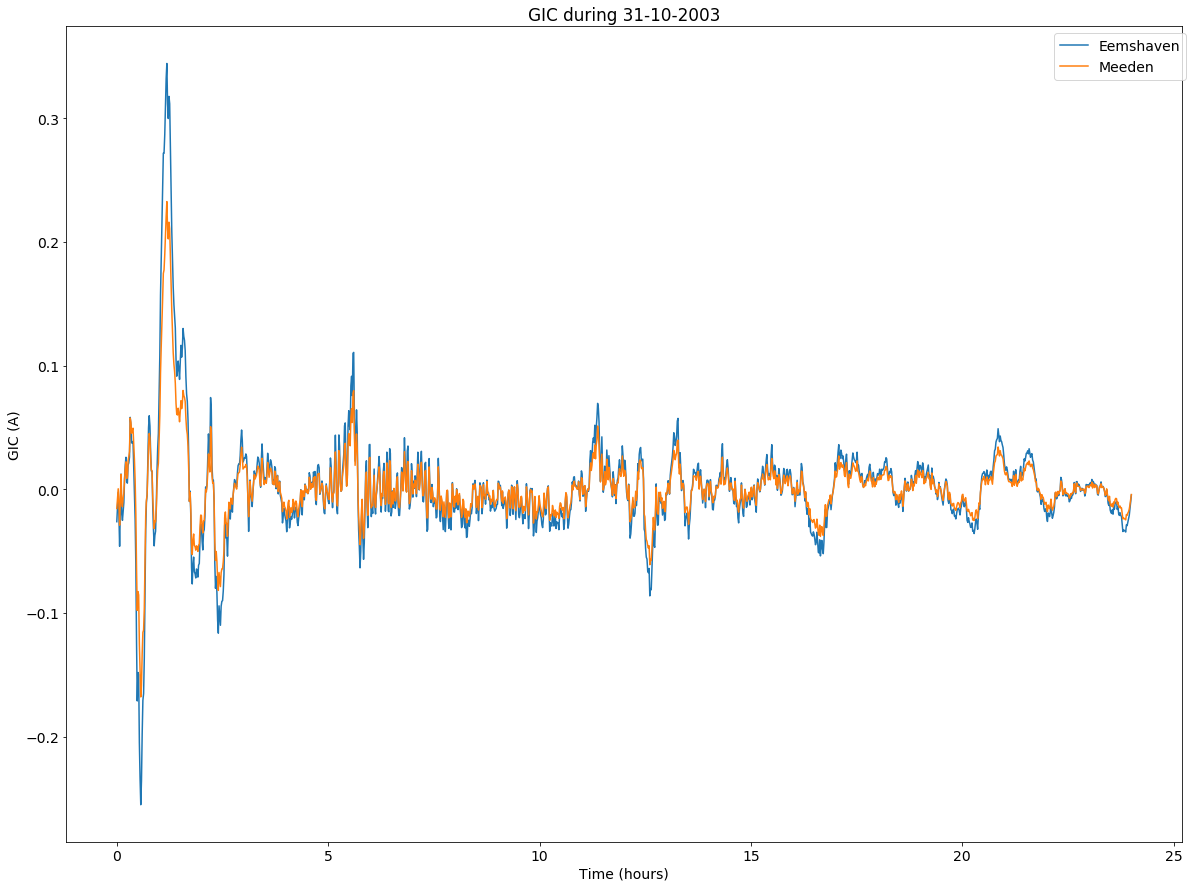

In [8]:
Case_1.plot_GIC([0,1])

If you want to run everything on default settings, you could also run the "Case_1.runall()" function. This runs all functions described above in order.

### GIC index
This code can also calculate the GIC index through time for various stations for the given day using the function _GIC_index_. The only optional argument here, is whether you want to overwrite a file which contains the old maximum GIC index values or not (default is not overwritten, False). A plot is generated in your processed data file, also the file with the max GIC index is located there. To run the code, we use:

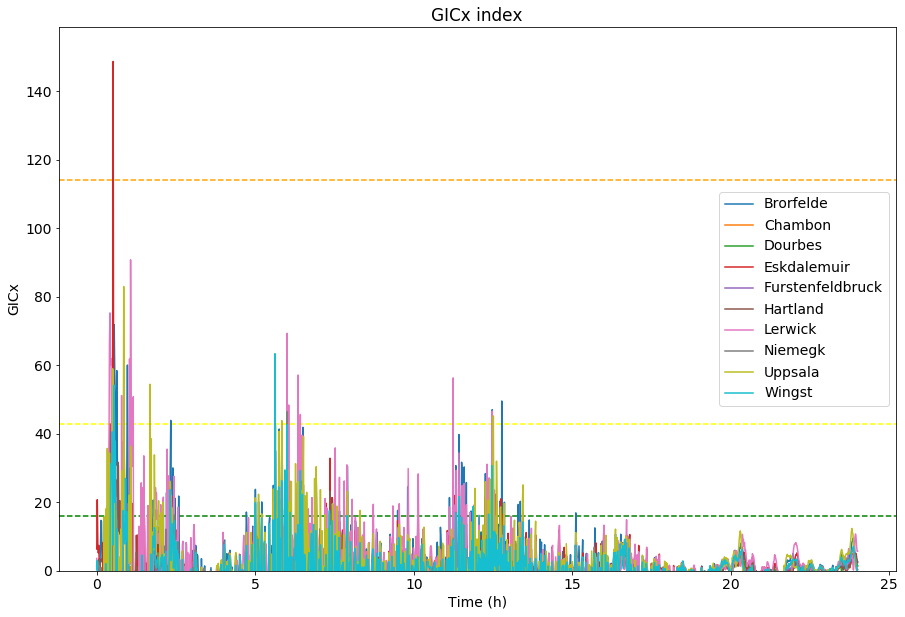

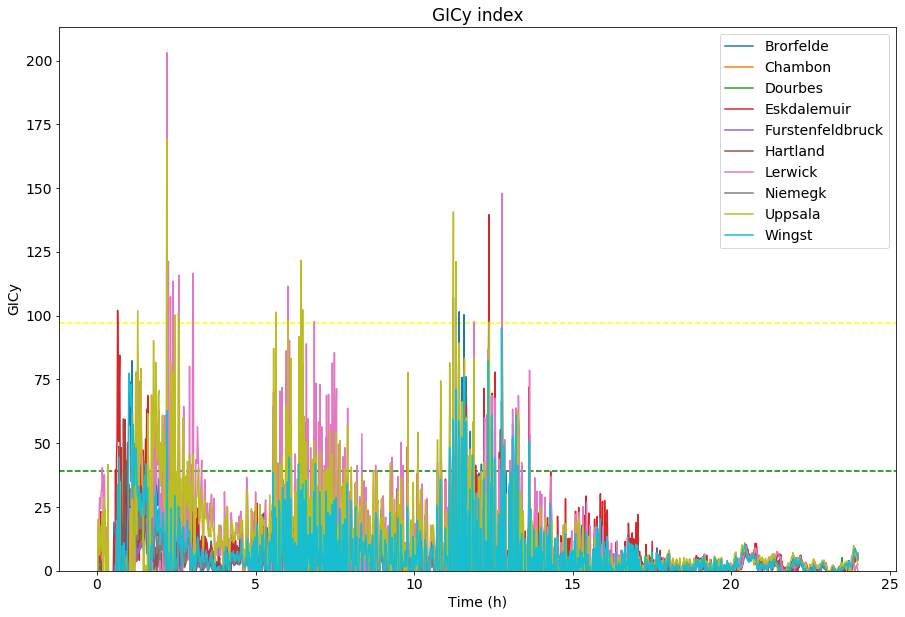

In [9]:
Case_1.GIC_index(overwrite=True)